In [15]:
library(car)
library(MASS)
library(rms)
library(glmnet)
library(leaps)
require(ggplot2)
library(cvTools)
set.seed(1234)

Loading required package: robustbase

Attaching package: ‘robustbase’

The following object is masked from ‘package:survival’:

    heart



In [16]:
fat.rm=read.csv("../data/clean_fat.csv",header=T)
head(fat.rm)

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


# Part III: Variable Selection

First we fit the full model and the null model.

In [17]:
lm.full = lm(BODYFAT~.,fat.rm)
lm.null = lm(BODYFAT~1,fat.rm)

### 3.1 Variable Selection Based on $C_p$

In [18]:
temp <- regsubsets(fat.rm[,-c(1:3)],y=fat.rm$BODYFAT ,nbest=1,method="exhaustive",nvmax=4)
temp.mat <- cbind(summary(temp)$which,
                  summary(temp)$rsq,
                  summary(temp)$adjr2,
                  summary(temp)$cp)
dimnames(temp.mat)[[2]] <- c(dimnames(summary(temp)$which)[[2]],"rsq","adjrsq","cp")

In [19]:
temp.mat

(Intercept),HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,rsq,adjrsq,cp
1,0,0,0,0,1,0,0,0,0,0,0,0,0.6606106,0.6592197,63.55052
1,0,0,0,0,1,0,0,0,0,0,0,1,0.6990451,0.6965681,30.94813
1,0,0,0,0,1,1,0,0,0,0,0,1,0.7185459,0.7150568,15.39166
1,0,0,1,0,1,1,0,0,0,0,0,1,0.7242928,0.7197167,12.21779


### 3.2 Variable Selection Based on AIC and BIC

**3.2.1** Both sides

In [20]:
model.aic.both <- step(lm.full, direction = "both", k = 2,trace=0)
summary(model.aic.both)


Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    ABDOMEN + HIP + THIGH + FOREARM + WRIST, data = fat.rm)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6266 -2.6814 -0.3015  2.7093  9.1961 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -124.53037   47.77827  -2.606  0.00973 ** 
AGE            0.05771    0.02865   2.014  0.04514 *  
WEIGHT        -0.37777    0.13106  -2.883  0.00431 ** 
HEIGHT         1.51687    0.68044   2.229  0.02674 *  
ADIPOSITY      2.18429    0.95268   2.293  0.02274 *  
NECK          -0.38411    0.21176  -1.814  0.07097 .  
ABDOMEN        0.84346    0.07990  10.557  < 2e-16 ***
HIP           -0.22898    0.13045  -1.755  0.08052 .  
THIGH          0.30992    0.12171   2.546  0.01152 *  
FOREARM        0.42402    0.17414   2.435  0.01564 *  
WRIST         -1.36343    0.47866  -2.848  0.00478 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.91

In [21]:
model.bic.both <- step(lm.full, direction = "both", k = log(length(fat.rm[,1])),trace=0)
summary(model.bic.both)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST, data = fat.rm)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0277  -2.7463  -0.1504   2.9042   8.2718 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -32.90502    6.83115  -4.817 2.58e-06 ***
WEIGHT       -0.13345    0.02320  -5.751 2.68e-08 ***
ABDOMEN       0.92853    0.05217  17.798  < 2e-16 ***
FOREARM       0.46965    0.16788   2.798  0.00557 ** 
WRIST        -1.29558    0.41603  -3.114  0.00207 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.982 on 241 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.7318 
F-statistic: 168.1 on 4 and 241 DF,  p-value: < 2.2e-16


**3.2.2** Backward direction

In [22]:
#direction=backward
model.aic.backward <- step(lm.full, direction = "backward", k = 2,trace=0)
summary(model.aic.backward)


Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    ABDOMEN + HIP + THIGH + FOREARM + WRIST, data = fat.rm)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6266 -2.6814 -0.3015  2.7093  9.1961 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -124.53037   47.77827  -2.606  0.00973 ** 
AGE            0.05771    0.02865   2.014  0.04514 *  
WEIGHT        -0.37777    0.13106  -2.883  0.00431 ** 
HEIGHT         1.51687    0.68044   2.229  0.02674 *  
ADIPOSITY      2.18429    0.95268   2.293  0.02274 *  
NECK          -0.38411    0.21176  -1.814  0.07097 .  
ABDOMEN        0.84346    0.07990  10.557  < 2e-16 ***
HIP           -0.22898    0.13045  -1.755  0.08052 .  
THIGH          0.30992    0.12171   2.546  0.01152 *  
FOREARM        0.42402    0.17414   2.435  0.01564 *  
WRIST         -1.36343    0.47866  -2.848  0.00478 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.91

In [23]:
model.bic.backward <- step(lm.full, direction = "backward", k = log(length(fat.rm[,1])),trace=0)
summary(model.bic.backward)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST, data = fat.rm)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0277  -2.7463  -0.1504   2.9042   8.2718 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -32.90502    6.83115  -4.817 2.58e-06 ***
WEIGHT       -0.13345    0.02320  -5.751 2.68e-08 ***
ABDOMEN       0.92853    0.05217  17.798  < 2e-16 ***
FOREARM       0.46965    0.16788   2.798  0.00557 ** 
WRIST        -1.29558    0.41603  -3.114  0.00207 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.982 on 241 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.7318 
F-statistic: 168.1 on 4 and 241 DF,  p-value: < 2.2e-16


**3.2.3** Forward direction

In [24]:
#direction=forward
model.aic.forward <- step(lm.null,~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
                            ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
                            WRIST, direction = "forward", k = 2,trace=0)
summary(model.aic.forward)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + FOREARM + NECK + 
    BICEPS, data = fat.rm)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5528 -2.8526 -0.2014  2.9533  8.5052 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -30.53832    7.25584  -4.209 3.64e-05 ***
ABDOMEN       0.94345    0.05235  18.021  < 2e-16 ***
WEIGHT       -0.13673    0.02599  -5.262 3.17e-07 ***
WRIST        -1.07850    0.43759  -2.465   0.0144 *  
FOREARM       0.42158    0.17932   2.351   0.0195 *  
NECK         -0.35291    0.20534  -1.719   0.0870 .  
BICEPS        0.23745    0.15147   1.568   0.1183    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.958 on 239 degrees of freedom
Multiple R-squared:  0.7414,	Adjusted R-squared:  0.7349 
F-statistic: 114.2 on 6 and 239 DF,  p-value: < 2.2e-16


In [25]:
model.bic.forward <- step(lm.null,~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
                            ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
                            WRIST, direction = "forward", k = log(length(fat.rm[,1])),trace=0)
summary(model.bic.forward)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + FOREARM, data = fat.rm)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0277  -2.7463  -0.1504   2.9042   8.2718 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -32.90502    6.83115  -4.817 2.58e-06 ***
ABDOMEN       0.92853    0.05217  17.798  < 2e-16 ***
WEIGHT       -0.13345    0.02320  -5.751 2.68e-08 ***
WRIST        -1.29558    0.41603  -3.114  0.00207 ** 
FOREARM       0.46965    0.16788   2.798  0.00557 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.982 on 241 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.7318 
F-statistic: 168.1 on 4 and 241 DF,  p-value: < 2.2e-16


### 3.3 Variable Selection Based on F-test

In [26]:
#F-test
ols.full = ols(BODYFAT~., fat.rm)
fastbw(ols.full, rule = "p", sls = 0.1)



 Deleted Chi-Sq d.f. P      Residual d.f. P      AIC   R2   
 KNEE    0.04   1    0.8427  0.04    1    0.8427 -1.96 0.754
 CHEST   0.46   1    0.4970  0.50    2    0.7785 -3.50 0.754
 ANKLE   0.78   1    0.3765  1.28    3    0.7332 -4.72 0.753
 BICEPS  1.11   1    0.2927  2.39    4    0.6644 -5.61 0.752
 HIP     3.06   1    0.0802  5.45    5    0.3635 -4.55 0.749
 NECK    2.14   1    0.1431  7.59    6    0.2694 -4.41 0.746
 AGE     3.82   1    0.0507 11.41    7    0.1216 -2.59 0.742

Approximate Estimates after Deleting Factors

               Coef     S.E. Wald Z        P
Intercept -127.2782 46.85953 -2.716 0.006604
WEIGHT      -0.4000  0.12922 -3.095 0.001966
HEIGHT       1.2688  0.66504  1.908 0.056417
ADIPOSITY    1.7408  0.93054  1.871 0.061388
ABDOMEN      0.9127  0.06901 13.226 0.000000
THIGH        0.1527  0.10370  1.472 0.140923
FOREARM      0.4068  0.16870  2.411 0.015891
WRIST       -1.1433  0.42445 -2.694 0.007066

Factors in Final Model

[1] WEIGHT    HEIGHT    ADIPOSITY 

### 3.4 Variable Selection Based on LASSO

[1] 0.003327938


Call:  glmnet(x = as.matrix(fat.rm[-1]), y = fat.rm$BODYFAT, lambda = cv.fit$lambda.min) 

     Df   %Dev   Lambda
[1,] 14 0.7539 0.003328

15 x 1 sparse Matrix of class "dgCMatrix"
                  1
(Intercept) -99.454
AGE           0.055
WEIGHT       -0.316
HEIGHT        1.150
ADIPOSITY     1.693
NECK         -0.380
CHEST        -0.056
ABDOMEN       0.884
HIP          -0.216
THIGH         0.239
KNEE          0.023
ANKLE         0.162
BICEPS        0.174
FOREARM       0.389
WRIST        -1.491

15 x 1 sparse Matrix of class "dgCMatrix"
                 1
(Intercept) -0.611
AGE          0.043
WEIGHT       .    
HEIGHT      -0.256
ADIPOSITY    .    
NECK        -0.166
CHEST        .    
ABDOMEN      0.637
HIP          .    
THIGH        .    
KNEE         .    
ANKLE        .    
BICEPS       .    
FOREARM      0.126
WRIST       -1.129

AGE  HEIGHT ABDOMEN   WRIST 
  1.237   1.374   1.661   1.971

[1] 0.2189561

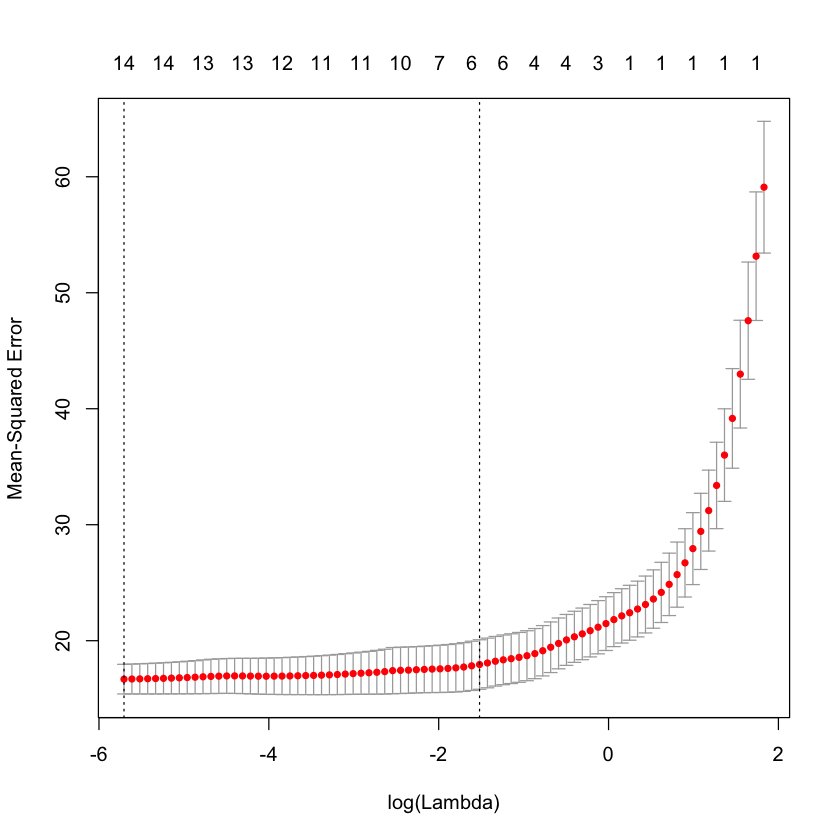

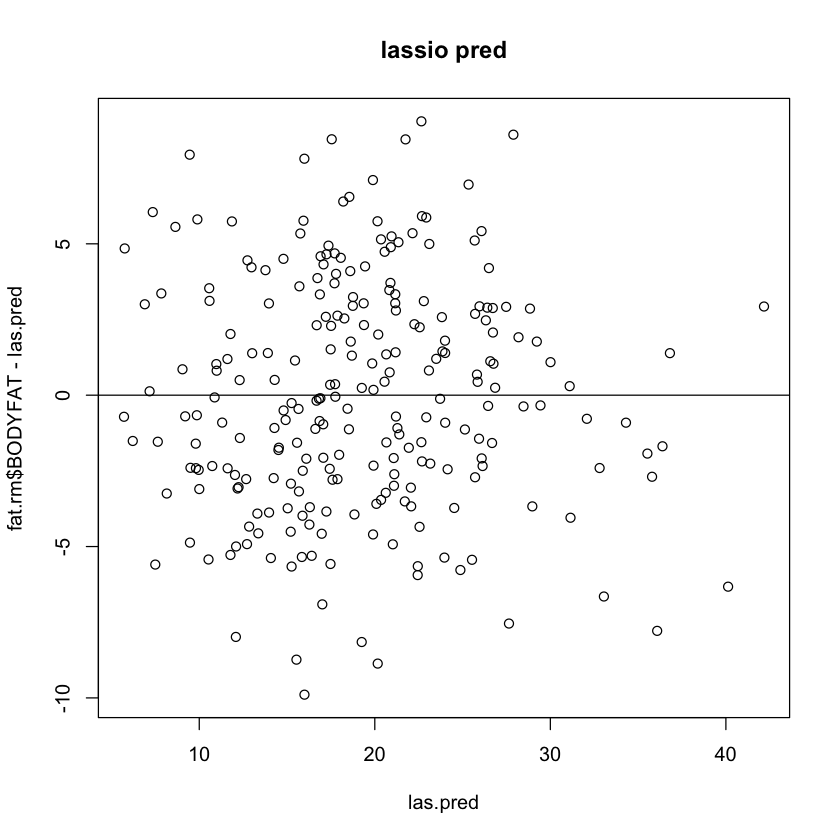

In [28]:
# LASSO
cv.fit=cv.glmnet(as.matrix(fat.rm[-1]),fat.rm$BODYFAT)#default 10 folds
plot(cv.fit)
cv.fit$lambda.min
las=glmnet(as.matrix(fat.rm[-1]),fat.rm$BODYFAT,lambda = cv.fit$lambda.min)
las
# “lambda.min”: lambda that gives minimum mse. May be too small to select features.
# “lambda.1se”: largest lambda s.t. mse is within 1 sd of minimum. Typically we choose lambda.1se.
round(coef(las,s = "lambda.min"),3)
round(coef(cv.fit, s = "lambda.1se" ),3)
round(vif(lm(BODYFAT~AGE+HEIGHT+ABDOMEN+WRIST,data=fat.rm)),3)
cv.fit$lambda.1se
las.pred=predict(las, s ="lambda.1se", newx = as.matrix(fat.rm[-1]))
plot(las.pred,fat.rm$BODYFAT-las.pred,main="lassio pred");abline(h=0)
las.res=fat.rm$BODYFAT-las.pred

### Cross validation

In [16]:
k = 10 #the number of folds
folds = cvFolds(nrow(fat.rm), K=k)
model1 = BODYFAT ~ ABDOMEN+WEIGHT
model2 = BODYFAT ~ ABDOMEN+WRIST
cv = function(model){
  ind.res = c()
  for(i in 1:k){
    train = fat.rm[folds$subsets[folds$which != i], ]
    model = lm(model, data = train)
    validation = fat.rm[folds$subsets[folds$which == 1], ]
    predict.fat = predict(model, newdata = validation[,c(2:ncol(fat.rm))])
    mse = sum((validation$BODYFAT-predict.fat)**2)/nrow(validation)
    ind.res = c(ind.res,mse)
  }
  return(mean(ind.res))
}
multi.cv = function(model){
  ind.mse = c()
  for(i in 1:1000){
    ind.mse = c(ind.mse,cv(model))
  }
  return(mean(ind.mse))
}
model1.cv=multi.cv(model1)
cat("BODYFAT ~ ABDOMEN+WEIGHT","\tCV=",model1.cv,"\n")
model2.cv=multi.cv(model2)
cat("BODYFAT ~ ABDOMEN+WRIST","\tCV=",model2.cv,"\n")

BODYFAT ~ ABDOMEN+WEIGHT 	CV= 18.53075 
BODYFAT ~ ABDOMEN+WRIST 	CV= 19.66227 


### Final Decision :BIC in forward direction

In [12]:
summary(model.bic.forward)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + FOREARM, data = fat.rm)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0277  -2.7463  -0.1504   2.9042   8.2718 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -32.90502    6.83115  -4.817 2.58e-06 ***
ABDOMEN       0.92853    0.05217  17.798  < 2e-16 ***
WEIGHT       -0.13345    0.02320  -5.751 2.68e-08 ***
WRIST        -1.29558    0.41603  -3.114  0.00207 ** 
FOREARM       0.46965    0.16788   2.798  0.00557 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.982 on 241 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.7318 
F-statistic: 168.1 on 4 and 241 DF,  p-value: < 2.2e-16
